In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
import os.path
from google.colab import drive

# mount Google Drive to /content/drive/My Drive/
if os.path.isdir("/content/drive/My Drive"):
  print("Google Drive already mounted")
else:
  drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! echo $PATH

import os
os.environ['PATH'] += ":/usr/local/cuda-8.0/bin"
os.environ['CUDADIR'] = "/usr/local/cuda-8.0"
os.environ['LD_LIBRARY_PATH'] = "/usr/lib64-nvidia:/usr/local/cuda-8.0/lib64"

!echo $PATH
!echo $LD_LIBRARY_PATH
!source ~/.bashrc

/opt/bin:/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin
/opt/bin:/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin:/usr/local/cuda-8.0/bin
/usr/lib64-nvidia:/usr/local/cuda-8.0/lib64


In [ ]:
!env | grep -i cuda

LD_LIBRARY_PATH=/usr/lib64-nvidia:/usr/local/cuda-8.0/lib64
CUDADIR=/usr/local/cuda-8.0
LIBRARY_PATH=/usr/local/cuda/lib64/stubs
CUDA_VERSION=11.1.1
NVIDIA_REQUIRE_CUDA=cuda>=11.1 brand=tesla,driver>=418,driver<419 brand=tesla,driver>=440,driver<441 brand=tesla,driver>=450,driver<451
PATH=/opt/bin:/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin:/usr/local/cuda-8.0/bin


In [ ]:
%cd /content/
!wget https://developer.nvidia.com/compute/cuda/8.0/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
!sudo apt-get install freeglut3 freeglut3-dev libxi-dev libxmu-dev
!sudo apt-get install build-essential dkms
!sudo dpkg -i cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
!sudo apt-key adv --fetch-keys https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/7fa2af80.pub

!sudo apt-get update
!sudo apt-get install cuda-8-0

/content
--2022-03-31 18:39:53--  https://developer.nvidia.com/compute/cuda/8.0/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
Resolving developer.nvidia.com (developer.nvidia.com)... 152.195.19.142
Connecting to developer.nvidia.com (developer.nvidia.com)|152.195.19.142|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://developer.nvidia.com/compute/cuda/8.0/prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb [following]
--2022-03-31 18:39:53--  https://developer.nvidia.com/compute/cuda/8.0/prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
Reusing existing connection to developer.nvidia.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://developer.download.nvidia.com/compute/cuda/8.0/secure/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64.deb?uSEuVzIG6jqhjpZ04pFQ-fzSqNxGF0mjVed6LXnatJGARHY3dq3J7yP41AvURT7rkjG3

In [ ]:
!sudo rm /usr/local/cuda
!sudo ln -s /usr/local/cuda-8.0 /usr/local/cuda
%ls -l /usr/local/

total 64
drwxr-xr-x  1 root root 4096 Mar 30 13:11 bin/
lrwxrwxrwx  1 root root   19 Mar 31 18:41 cuda -> /usr/local/cuda-8.0/
drwxr-xr-x 16 root root 4096 Mar 23 14:05 cuda-10.0/
drwxr-xr-x 15 root root 4096 Mar 23 14:07 cuda-10.1/
lrwxrwxrwx  1 root root   25 Mar 23 14:13 cuda-11 -> /etc/alternatives/cuda-11/
drwxr-xr-x 15 root root 4096 Mar 23 14:10 cuda-11.0/
drwxr-xr-x  1 root root 4096 Mar 23 14:12 cuda-11.1/
drwxr-xr-x 14 root root 4096 Mar 31 18:41 cuda-8.0/
drwxr-xr-x  1 root root 4096 Mar 23 14:23 etc/
drwxr-xr-x  2 root root 4096 Nov 19  2020 games/
drwxr-xr-x  2 root root 4096 Mar 23 14:32 _gcs_config_ops.so/
drwxr-xr-x  1 root root 4096 Mar 23 14:31 include/
drwxr-xr-x  1 root root 4096 Mar 23 14:32 lib/
drwxr-xr-x  3 root root 4096 Mar 23 14:31 licensing/
lrwxrwxrwx  1 root root    9 Nov 19  2020 man -> share/man/
drwxr-xr-x  2 root root 4096 Nov 19  2020 sbin/
drwxr-xr-x  1 root root 4096 Mar 23 14:30 share/
drwxr-xr-x  2 root root 4096 Nov 19  2020 src/
drwxr-xr-x  2 ro

In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2016 NVIDIA Corporation
Built on Tue_Jan_10_13:22:03_CST_2017
Cuda compilation tools, release 8.0, V8.0.61


In [ ]:
!apt install libnvrtc8.0
!pip install turicreate

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libnvrtc8.0
E: Couldn't find any package by glob 'libnvrtc8.0'
E: Couldn't find any package by regex 'libnvrtc8.0'
     |████████████████████████████████| 92.0 MB 25 kB/s 
     |████████████████████████████████| 322 kB 74.3 MB/s 
     |████████████████████████████████| 3.5 MB 47.9 MB/s 
     |████████████████████████████████| 86.4 MB 43 kB/s 
     |████████████████████████████████| 3.6 MB 66.3 MB/s 
     |████████████████████████████████| 18.3 MB 58.6 MB/s 
     |████████████████████████████████| 2.9 MB 79.6 MB/s 
     |████████████████████████████████| 50 kB 8.1 MB/s 
     |████████████████████████████████| 449 kB 84.6 MB/s 
     |████████████████████████████████| 3.8 MB 47.6 MB/s 
     |████████████████████████████████| 20.1 MB 91.7 MB/s 
  Created wheel for prettytable: filename=prettytable-0.7.2-py3-none-any.whl size=13714 sha256=8f679084d03ee37b8631c1713bb384

In [ ]:
!pip install mxnet-cu80

     |████████████████████████████████| 372.1 MB 33 kB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [ ]:
!pip install gast==0.3.2
!pip install numpy==1.19.0
!pip install resampy==0.2.2
!pip install requests==2.23.0
!pip install folium==0.2.1
!pip install imgaug==0.2.5

  Created wheel for gast: filename=gast-0.3.2-py3-none-any.whl size=9694 sha256=49e842bf92447b4eed15358dcdffb11e8c7f1f55dfb7d14f52afc2497af44dd4
  Stored in directory: /root/.cache/pip/wheels/9b/7b/89/365a82e420c11db9b43d34918045faa8004748a1d97597930d
Successfully built gast
  Attempting uninstall: gast
    Found existing installation: gast 0.2.2
    Uninstalling gast-0.2.2:
      Successfully uninstalled gast-0.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.0.4 requires gast==0.2.2, but you have gast 0.3.2 which is incompatible.


     |████████████████████████████████| 14.6 MB 6.9 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18.5:
      Successfully uninstalled numpy-1.18.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.0.4 requires gast==0.2.2, but you have gast 0.3.2 which is incompatible.
tensorflow 2.0.4 requires numpy<1.19.0,>=1.16.0, but you have numpy 1.19.0 which is incompatible.
librosa 0.8.1 requires resampy>=0.2.2, but you have resampy 0.2.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


     |████████████████████████████████| 323 kB 6.6 MB/s 
  Created wheel for resampy: filename=resampy-0.2.2-py3-none-any.whl size=320732 sha256=9cba47443eff47c25b67167118665c516f795b0ccb5059a38f06599071ea98af
  Stored in directory: /root/.cache/pip/wheels/a0/18/0a/8ad18a597d8333a142c9789338a96a6208f1198d290ece356c
Successfully built resampy
  Attempting uninstall: resampy
    Found existing installation: resampy 0.2.1
    Uninstalling resampy-0.2.1:
      Successfully uninstalled resampy-0.2.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
turicreate 6.4.1 requires resampy==0.2.1, but you have resampy 0.2.2 which is incompatible.
     |████████████████████████████████| 69 kB 4.4 MB/s 
  Created wheel for folium: filename=folium-0.2.1-py3-none-any.whl size=79808 sha256=473d9c40a135492497793ba39fe77919c0036cdf80c4af3ae7add1f138bf681d
  Stored in directory: /roo

## Google Drive Access

You will be asked to click a link to generate a secret key to access your Google Drive. 

Copy and paste secret key it into the space provided with the notebook.

## Setup Turi Create

In [ ]:
import mxnet as mx
import turicreate as tc
import os

In [ ]:
tc.config.set_num_gpus(-1)

TuriCreate currently only supports using one GPU. Setting 'num_gpus' to 1.


## Loading Data



In [ ]:
! unrar x ./drive/MyDrive/aboutyou /content/

Streaming output truncated to the last 5000 lines.
Extracting  /content/aboutyou/9de7ceae-0df8-4b38-9c68-1ea57d00189e.jpg      62%  OK 
Extracting  /content/aboutyou/9deae82c-2b26-4873-84f5-898d26715b49.jpg      62%  OK 
Extracting  /content/aboutyou/9df02943-5b21-44f0-9b25-b452e8632069.jpg      62%  OK 
Extracting  /content/aboutyou/9dfd8710-5cab-40df-a989-b4c384915c49.jpg      62%  OK 
Extracting  /content/aboutyou/9dffcf6a-9ae3-4b61-8425-284ba0144839.jpg      62%  OK 
Extracting  /content/aboutyou/9e07604b-5cbf-47cf-a674-90e871c8e900.jpg      62%  OK 
Extracting  /content/aboutyou/9e1c1dce-7a77-49f3-bc3c-7b657345c627.jpg      62%  OK 
Extracting  /content/aboutyou/9e2ca7bf-b4b0-4550-ab2e-667b69d18365.jpg      62%  OK 
Extracting  /content/aboutyou/9e2da2b5-6aba-461a-8445-f2692db5e58a.jpg      62%  OK 
Extracting  /content/aboutyou/9e350ad4-b2e0-49c3-be54-150285fa1a18.jpg      62%  OK 
Extractin

In [ ]:
from PIL import Image
import os
!mkdir aboutyou1
directory = './aboutyou/'
c=1
for filename in os.listdir(directory):
    if filename.endswith(".jpg"):
        im = Image.open(directory+filename)
        name = filename[:-4]
        im.save('/content/aboutyou1/'+ name + '.png')
        print(os.path.join(directory, filename))
        continue
    else:
        continue

Streaming output truncated to the last 5000 lines.
./aboutyou/b3382228-4d81-40aa-a16d-281bf4f35aa4.jpg
./aboutyou/c4b9624c-374e-467b-aa89-6718480d6c88.jpg
./aboutyou/8528abc0-b58b-4671-889d-268395dcdeed.jpg
./aboutyou/0fd984fb-1d44-4075-bad6-08f819ab61a2.jpg
./aboutyou/5f1331d4-b646-4132-9e65-8947939d7dc0.jpg
./aboutyou/c6a350db-f065-4366-8cb7-b87c17327507.jpg
./aboutyou/32da54a0-e405-44cb-b69a-b2d73453240b.jpg
./aboutyou/e9745458-e618-4d48-821a-d20d9c8625c6.jpg
./aboutyou/f4c775dc-e73d-47ae-8595-c1d2c03a5b38.jpg
./aboutyou/6d907a38-9b8c-4dfd-a16c-31e94d6a64d3.jpg
./aboutyou/9c9dc875-fa10-4612-9c1d-ae22e2caf5ae.jpg
./aboutyou/3a3e30f0-2f2f-469c-b5a5-9216cb72c14c.jpg
./aboutyou/7c44053a-68dd-4c6f-a351-2a2476d84dc0.jpg
./aboutyou/960011af-749a-4efc-bcc2-3dc2f58e8c5c.jpg
./aboutyou/87f21152-4887-4684-aa79-161c5591c2b0.jpg
./aboutyou/1471561d-2261-4134-96cc-18de2b65227a.jpg
./aboutyou/323b2bb6-2e35-4254-b84d-c530183b1b3b.jpg
./aboutyou/3229d47d-d0c2-42a9-b5f2-3aa2acdce94f.jpg
./aboutyou/e4

In [ ]:
!unzip models.zip

Archive:  models.zip
   creating: models/
   creating: models/ELLESSE/
  inflating: models/ELLESSE/m_dd63240924d6ea73.0000  
  inflating: models/ELLESSE/m_dd63240924d6ea73.sidx  
  inflating: models/ELLESSE/objects.bin  
  inflating: models/ELLESSE/dir_archive.ini  
   creating: models/Vero Moda Maternity/
  inflating: models/Vero Moda Maternity/m_70404ce1ff782c2f.0000  
  inflating: models/Vero Moda Maternity/m_70404ce1ff782c2f.sidx  
  inflating: models/Vero Moda Maternity/objects.bin  
  inflating: models/Vero Moda Maternity/dir_archive.ini  
   creating: models/Veja/
  inflating: models/Veja/m_77bc9e41bc112855.sidx  
  inflating: models/Veja/objects.bin  
  inflating: models/Veja/dir_archive.ini  
  inflating: models/Veja/m_77bc9e41bc112855.0000  
   creating: models/Little Pieces/
  inflating: models/Little Pieces/m_933110de4966a04c.sidx  
  inflating: models/Little Pieces/m_933110de4966a04c.0000  
  inflating: models/Little Pieces/objects.bin  
  inflating: models/Little Pieces/d

In [ ]:
from IPython.display import display
from IPython.display import HTML
from PIL import Image
from io import BytesIO
import glob
import random
import base64
import pandas as pd

def get_thumbnail(path):
  i = Image.open(path)
  i.thumbnail((150, 150), Image.LANCZOS)
  return i
  
def get_thumbnail_from_image(img):
  i = img.copy()
  i.thumbnail((150, 150), Image.LANCZOS)
  return i

def image_base64(im):
  if isinstance(im, str):
    im = get_thumbnail(im)
  with BytesIO() as buffer:
    im.save(buffer, 'jpeg')
    return base64.b64encode(buffer.getvalue()).decode()

def image_formatter(im):
  return f'<img style="display:inline;margin:1px" src="data:image/jpeg;base64,{image_base64(im)}">'
  
def preview_images(reference_data, num_previews=30):
  images = list(map(lambda x:image_formatter(get_thumbnail(x)), reference_data[0:num_previews]['path']))
  display(HTML(''.join(images)))

In [ ]:
reference_data  = tc.image_analysis.load_images('/content/aboutyou1/')
reference_data['label'] = reference_data['path'].apply(lambda path: path.split('/')[3])
reference_data


Read 8128 images in 6.31986 secs	speed: 1286.1 file/sec

path,image,label
/content/aboutyou1/00053d02-8f5e-4261-a686-e4f ...,Height: 800 Width: 600,00053d02-8f5e-4261-a686-e4f3b5228b24.png ...
/content/aboutyou1/000689cf-b965-4f94-b240-939 ...,Height: 800 Width: 600,000689cf-b965-4f94-b240-93933ea5bcd2.png ...
/content/aboutyou1/0006e039-0af3-4dcf- ...,Height: 800 Width: 600,0006e039-0af3-4dcf-bb10-ba078142f0ca.png ...
/content/aboutyou1/0008c3e0-7c99-4d3a-bd6b-2dd ...,Height: 800 Width: 600,0008c3e0-7c99-4d3a-bd6b-2dd5bb7891a6.png ...
/content/aboutyou1/0013853f-7cd2-46cd- ...,Height: 800 Width: 600,0013853f-7cd2-46cd-ba42-d1f780024a8a.png ...
/content/aboutyou1/0013d9d6-07ac-4d93-be1e-9fe ...,Height: 800 Width: 600,0013d9d6-07ac-4d93-be1e-9fe407c383e7.png ...
/content/aboutyou1/0019a428-1bc0-4462-9c9f-791 ...,Height: 800 Width: 600,0019a428-1bc0-4462-9c9f-791856a9e3bd.png ...
/content/aboutyou1/001b4740-6dac-4d54-ad8f-ceb ...,Height: 800 Width: 275,001b4740-6dac-4d54-ad8f-cebb21476ef3.png ...
/content/aboutyou1/001cdae1-2dea-4d90-84dd-b96 ...,Height: 800 Width: 600,001cdae1-2dea-4d90-84dd-b9647165eaf3.png ...
/content/aboutyou1/002e3814-10ac-4c73-aab9-51c ...,Height: 800 Width: 600,002e3814-10ac-4c73-aab9-51c8d8f62f7d.png ...


In [ ]:
!rm -rf ./models/Pieces\ Maternity


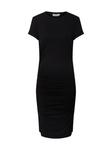
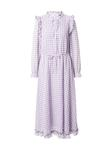
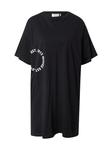
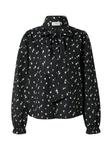
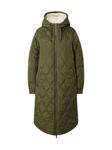
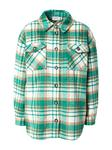
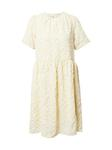
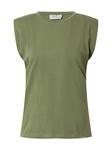
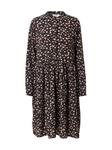
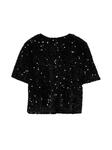

In [ ]:
preview_images(reference_data, 10)

## Creating the model

*  Stage 1: Uses a pre-trained CNN classifier on a large, general dataset. 
*   Stage 2: The outputs of each layer in the CNN can be viewed as a meaningful vector representation of each image. Extract these feature vectors from the layer prior to the output layer.
* Stage 3: Create a nearest neighbors model with those feature vectors as input


In [ ]:
# create an image similarity model using the data
model = tc.image_similarity.create(reference_data,label='label',feature='image', batch_size=32, model='squeezenet_v1.1')

Download completed: /var/tmp/model_cache/squeezenet_v1.1-TuriCreate-6.0.h5
Performing feature extraction on resized images...
Completed    32/13159
Completed    64/13159
Completed    96/13159
Completed   128/13159
Completed   160/13159
Completed   192/13159
Completed   224/13159
Completed   256/13159
Completed   288/13159
Completed   320/13159
Completed   352/13159
Completed   384/13159
Completed   416/13159
Completed   448/13159
Completed   480/13159
Completed   512/13159
Completed   544/13159
Completed   576/13159
Completed   608/13159
Completed   640/13159
Completed   672/13159
Completed   704/13159
Completed   736/13159
Completed   768/13159
Completed   800/13159
Completed   832/13159
Completed   864/13159
Completed   896/13159
Completed   928/13159
Completed   960/13159
Completed   992/13159
Completed  1024/13159
Completed  1056/13159
Completed  1088/13159
Completed  1120/13159
Completed  1152/13159
Completed  1184/13159
Completed  1216/13159
Completed  1248/13159
Completed  1280/

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

In [ ]:
model = tc.image_similarity.create(reference_data,label='label',feature='image', batch_size=32, model='resnet-50')
model.save('./models/saucony')

Performing feature extraction on resized images...
Completed 32/49
Completed 49/49


Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

In [ ]:
!zip -r ./models.zip ./models

  adding: models/ (stored 0%)
  adding: models/ELLESSE/ (stored 0%)
  adding: models/ELLESSE/m_dd63240924d6ea73.0000 (deflated 20%)
  adding: models/ELLESSE/m_dd63240924d6ea73.sidx (deflated 38%)
  adding: models/ELLESSE/objects.bin (deflated 63%)
  adding: models/ELLESSE/dir_archive.ini (deflated 19%)
  adding: models/Vero Moda Maternity/ (stored 0%)
  adding: models/Vero Moda Maternity/m_70404ce1ff782c2f.0000 (deflated 20%)
  adding: models/Vero Moda Maternity/m_70404ce1ff782c2f.sidx (deflated 38%)
  adding: models/Vero Moda Maternity/objects.bin (deflated 66%)
  adding: models/Vero Moda Maternity/dir_archive.ini (deflated 19%)
  adding: models/Veja/ (stored 0%)
  adding: models/Veja/m_77bc9e41bc112855.sidx (deflated 38%)
  adding: models/Veja/objects.bin (deflated 68%)
  adding: models/Veja/dir_archive.ini (deflated 19%)
  adding: models/Veja/m_77bc9e41bc112855.0000 (deflated 20%)
  adding: models/Little Pieces/ (stored 0%)
  adding: models/Little Pieces/m_933110de4966a04c.sidx (def

In [ ]:
!mkdir models


## Querying the model


In [ ]:
model = tc.load_model('./models/vero moda')

In [ ]:
sample_image = tc.Image('/content/zalando/79375586-5abe-4fcf-a6a7-88803b8e37ba.jpg')
sample_image = tc.image_analysis.resize(sample_image, 360, 150)
sample_image.save("sample_image_thumb.jpg")
sample_image_thumb_pil = Image.open("content/sample_image_thumb.jpg")
display(sample_image_thumb_pil)

In [ ]:
# query_results = model.query(reference_data[sample_index:sample_index+1], k=20)
query_results = model.query(sample_image, k=10)
query_results.head()


Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0562746   | 8.421ms      |

| Done         |         | 100         | 62.309ms     |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,e528228d-048e-4ed7-a89c-2a998daac12d.png ...,11.201824374979902,1
0,373a6976-02cb-416f-83c2-3de325afa807.png ...,11.25494403577159,2
0,b829ff2f-6a24-432b-8fc0-0c74404ac297.png ...,11.282467838658123,3
0,6a79646e-e296-4018-aaa6-94cd554f8a4f.png ...,11.547434518440221,4
0,e7b942d8-4505-4753-b0e4-19b90c58b016.png ...,11.565651438389883,5
0,12101c92-f085-428b-a0e4-469edcf3a3ee.png ...,11.659120183031925,6
0,796dae86-c73b-4168-b0f8-63e760f0c93f.png ...,11.771634610552875,7
0,39eb846d-3bd1-4bc0-8167-5a0e7b30e235.png ...,11.779535709942786,8
0,67baeb02-4b80-442b-9f2f-f1a9d602bf64.png ...,11.829880536235247,9
0,4d383108-7613-40d6-8844-f1f5a4dd7d63.png ...,11.864981969420594,10


In [ ]:
# saving the model
# model.save('./model_small')
loaded_model = tc.load_model('./model_large')

In [ ]:
!zip -r ./model_small.zip ./model_small

  adding: model_small/ (stored 0%)
  adding: model_small/m_16faee3217d609c0.0000 (deflated 22%)
  adding: model_small/objects.bin (deflated 56%)
  adding: model_small/dir_archive.ini (deflated 19%)
  adding: model_small/m_16faee3217d609c0.sidx (deflated 38%)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
matches = pd.read_parquet('matches_training.parquet')
x=list(matches['zalando'])
y=list(matches['aboutyou'])
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)
matches=pd.DataFrame(list(zip(X_test, y_test)), columns =['zalando', 'aboutyou'])
matches=matches.iloc[:-1]
matches=matches.drop(matches[matches['zalando'] == '0ceeb838-263c-4e43-9da2-5a58b785ffcb'].index)
matches=matches.drop(matches[matches['zalando'] == '967a8d24-810b-4ecb-85a1-ecdae57e6b73'].index)
matches


,zalando,aboutyou
0,9ab83c3b-8a83-4c20-bb8c-036a317ba95a,bfa10d76-bdc8-4b2b-b2af-22e131184aa8
1,e7601e52-fc4d-4db5-8d2f-90b4a70b9745,f5575cc7-5e08-4576-9d56-564d83805461
2,4ef41866-eeb0-4a7d-ba52-f9cf6bde1245,14f83044-0902-48b7-9db3-d485929cd529
3,2c22c286-e83f-4692-95d4-66675281c479,7da05832-5286-410d-a9dd-deb0316f5c3f
4,ccac2c72-adc7-4f68-b6a5-99cd08d0641b,880518bb-262f-46b8-b47d-1e339e2b1b87
...,...,...
3028,d70b98ec-bade-426b-a3f5-3878bf78eedf,7162b833-0b53-4f88-b7f1-55eb53b2d181
3029,eaa548e9-d85f-4197-8d1e-0fd5d1db6f03,e5231fd6-cb9d-4069-b94e-3bb330395dfe
3030,ac906299-5025-4a1e-9bcb-440f67cf2137,142ffb3c-1ce2-475a-bfa2-6a567d8f36b8
3031,a73a70ac-9415-43f3-bcfe-d43c8888e402,f79ee1d0-b274-4b9a-b5d9-c8742e8262d2


In [ ]:
matches[matches['zalando']=='c6a7435e-7db5-4551-9237-179c9a34d644']

,zalando,aboutyou
24,c6a7435e-7db5-4551-9237-179c9a34d644,36ab74a7-ea80-4622-8110-1dea2a6f19a3


In [ ]:
import os
zalando_id=[a[:-4] for a in os.listdir('./zalando')]
aboutyou_id=[a[:-4] for a in os.listdir('./aboutyou')]
z=pd.DataFrame(zalando_id, columns=['zalando'])
a=pd.DataFrame(aboutyou_id, columns=['aboutyou'])
offers=pd.read_parquet('offers_training.parquet')
offers=offers.rename(columns={'offer_id':'zalando'})
shop_zalando=pd.merge(z,offers,on='zalando')
offers=offers.rename(columns={'zalando':'aboutyou'})
shop_aboutyou=pd.merge(a,offers,on='aboutyou')

In [ ]:
len(os.listdir('./zalando1'))

13159

In [ ]:
shop_zalando

,zalando,shop,lang,brand,color,title,description,price,url,image_urls
0,80409573-1ca0-4395-a16f-0d442690e345,zalando,de,Pieces,braun,PCFELICITY LONG PUFFER JACKET Wintermantel,skirt_details Eingrifftaschen | unterlegter Re...,99.990909,https://www.zalando.de/lookup/article/PE321U03...,[https://img01.ztat.net/article/fa2d3ba0b7d241...
1,78134adb-af25-414c-bdbd-251e354501b9,zalando,de,More & More,orange,SLEEVE Bluse T-Shirt print,main_supplier_code K75573 $ name_suffix orange...,39.990909,https://www.zalando.de/lookup/article/M5821E0X...,[https://img01.ztat.net/article/7572383aa40a4c...
2,ac403d5a-c62c-4011-8360-256c20fc141e,zalando,de,Pieces Maternity,blue denim,PCMDELLA Jeans Skinny Fit,main_supplier_code K70240 $ skirt_details elas...,44.958182,https://www.zalando.de/lookup/article/PIV29A00...,[https://img01.ztat.net/article/baebe4ea13e737...
3,b8d0a370-786d-4200-8fc6-cfb646a58ef0,zalando,de,Selected,hellblau,SLFMONIKA PUFFER JACKET Winterjacke,skirt_details Eingrifftaschen | Knopfleiste $ ...,119.990909,https://www.zalando.de/lookup/article/SE521U06...,[https://img01.ztat.net/article/52e1cc452fe947...
4,f1d1ce2d-9cb5-42eb-a17e-973a1c1c8a87,zalando,de,Didriksons,dunkelgrün,CAJSA WOMENS Outdoorjacke,sport_jacket_details getapte Nähte $ skirt_det...,199.958182,https://www.zalando.de/lookup/article/DI541F03...,[https://img01.ztat.net/article/9df0fba8ab014f...
...,...,...,...,...,...,...,...,...,...,...
13154,7bc637ca-d94b-4628-b5b3-f7812da09467,zalando,de,Guess,beige,HEYDEN GIRLFRIEND Umhängetasche,bag_compartment Handyfach $ skirt_details Niet...,149.867273,https://www.zalando.de/lookup/article/GU151H39...,[https://img01.ztat.net/article/ccd00667958945...
13155,3c3f0446-362c-4dc4-9c83-e268fd0360b6,zalando,de,Pieces,schwarz,Stoffhose,skirt_details elastischer Bund $ name_suffix b...,29.958182,https://www.zalando.de/lookup/article/PIU21A00...,[https://img01.ztat.net/article/9d92af20874642...
13156,5befd8ba-05c8-4a1d-9ee5-9476f4ec9d4d,zalando,de,Walkiddy,pink,RABBIT Pyjama,name_suffix pink $ pattern print $ material.up...,29.958182,https://www.zalando.de/lookup/article/WAG83B00...,[https://img01.ztat.net/article/c1e22d33883c45...
13157,afa645a8-de62-4fb1-a3e9-f1079499c51e,zalando,de,LASCANA,rot,WIRE BRA Bügel BH,main_supplier_code K10267 $ name_suffix red $ ...,30.990909,https://www.zalando.de/lookup/article/L8381A06...,[https://img01.ztat.net/article/b176ab41aac539...


In [ ]:
shop_zalando[shop_zalando['zalando']=='a73a70ac-9415-43f3-bcfe-d43c8888e402']

,zalando,shop,lang,brand,color,title,description,price,url,image_urls
9105,a73a70ac-9415-43f3-bcfe-d43c8888e402,zalando,de,Libertine-Libertine,pink,BUILT Leichte Jacke,main_supplier_code K86562 $ name_suffix blush ...,214.958182,https://www.zalando.de/lookup/article/LIQ21G00...,[https://img01.ztat.net/article/b0c8d4f9961043...


In [ ]:
shop_aboutyou[shop_aboutyou['aboutyou']=='36ab74a7-ea80-4622-8110-1dea2a6f19a3']

,aboutyou,shop,lang,brand,color,title,description,price,url,image_urls
2858,36ab74a7-ea80-4622-8110-1dea2a6f19a3,aboutyou,de,PIECES,cognac | Braun,Gürtel 'HAVEN',"{""Zielgruppe"": [""Female""], ""Material"": [""Glatt...",26.9,https://www.aboutyou.at/p/pieces/gurtel-haven-...,[https://cdn.aboutstatic.com/file/images/20954...


In [ ]:
list(shop_aboutyou[shop_aboutyou['brand']=='QUIKSILVER']['aboutyou'])

['aaa426c0-a0be-4a56-8e5e-4e11656cdf88',
 'ba590e01-8019-48ec-a02e-1fa11c3f8c97',
 'f1d33acc-8c24-4d3c-a606-ff9b74d4721f',
 'b0a305ca-04a9-4fc2-bdc9-da2148dec0d3',
 '16d3a44b-61e0-4010-ac08-b2f7197c9018',
 'b87a3b77-b69b-42a1-aa99-1b112068fc94',
 'd2accc74-68bd-4b06-88ff-8b9a42e20058',
 '6dff4991-ca81-400c-a385-f2f361a8f27e',
 'e290751d-32d4-4b25-8f78-537913879a66',
 '00dad331-1750-40b5-bbfb-df279af35526',
 '29f0a7bd-eb03-4aa3-8855-7935a869f053',
 'b4899abb-cd6e-4186-880e-04c4f74bcc91',
 'd3de7cf1-61a4-46a4-a3e9-1e2f07ece7d9',
 'dfe8c29f-158c-4c15-a3c4-883606570fc9',
 'c4d1a89e-cfc1-4a3d-875e-d79357116047',
 '3b5eef9a-a503-4855-b6b8-1b29c688b0ba',
 '050907fd-6388-4553-ad10-7d33cbc656b9',
 'b5a6deea-ba11-4bc8-a897-c600dd1767e2',
 '190c93c9-31b4-444f-9255-5f69df630602',
 '5365682d-63cc-4a2f-88f2-6f60383ee677',
 '01c31258-7a6e-4392-809a-0f7bc998dfdd',
 'b678f0fc-1016-46d1-b3b0-35427c27dfc4',
 '1eac6bdf-4db4-4e71-8166-aea972831bce',
 '9933b1c7-67b7-4906-99db-80799a555c76',
 '6f5e715e-96fe-

In [ ]:
brand_map=[]
brands=list(shop_aboutyou['brand'].unique())
for brand in brands:
  brand_map.append(list(shop_aboutyou[shop_aboutyou['brand']==brand]['aboutyou']))
  print(brand)


VERO MODA
MAMALICIOUS
Vero Moda Tall
SELECTED FEMME
LASCANA
ELLESSE
SELECTED HOMME
KESSLER
Mennace
GUESS
Colmar
PIECES
BULLBOXER
K-SWISS
Vero Moda Curve
Selected Femme Tall
rosemunde
ETAM
Vero Moda Petite
Selected Femme Curve
Hust & Claire
Gestuz
BJÖRN BORG
Swarovski
PANAMA JACK
Herrlicher
Pieces Tall
camano
Pieces Petite
QUIKSILVER
BREE
Little Pieces
PIECES Curve
Vero Moda Maternity
BURLINGTON
MORE & MORE
Dockers
PRIMIGI
Esmé Studios
Denim Project
VIVANCE
Vero Moda Aware
Pieces Maternity
Fritzi aus Preußen
Liu Jo
Ted Baker
Kaffe
saucony
Rich & Royal
Moves
KAFFE CURVE
Libertine-Libertine
Mons Royale
FARAH
Zizzi
Happy Socks
CALL IT SPRING
PEAK PERFORMANCE
Garment Project
BRUUNS BAZAAR
Rukka
LIU JO JEANS
SALAMANDER
Walkiddy
Didriksons
Boley
JETTE
Mamalicious Curve
See by Chloé
HUF
estelle & thild
PETITE FLEUR GOLD
Envie de Fraise
Selected Femme Petite
Free People
LOCAL HEROES
H.I.S
Veja
JAKO
FLIP*FLOP
BURBERRY
JACKY
GORE WEAR
MOTHER
VERBENAS
Wheat
AG Jeans
Fuchs Schmitt
NUANCE
Club Monac

In [ ]:
len(brand_map)

104

In [ ]:
x=list(matches['zalando'])
x1=[]
for item in x:
  item_brand=list(shop_zalando[shop_zalando['zalando']==item]['brand'])[0]
  if item_brand.lower() in os.listdir('/content/models'):
    x1.append(item)
  else:
    print(item_brand)

Selected
Selected
Selected
Selected
Selected
Selected
Selected
Selected
Selected
Selected
Jacky Baby
Selected
Selected
Selected
Selected
Jacky Baby
Selected
Selected
Selected
Selected
Selected
Selected
Selected
Selected
Selected
Selected
Selected
Jacky Baby
Selected
Chloé
Selected
Selected
Selected
Selected
Jacky Baby
Selected
Chloé
Selected
Selected
Selected
Selected
Selected
Selected
Selected
Jacky Baby
Jacky Baby
Selected
Selected
Selected
Jacky Baby
Selected
Selected
Jacky Baby
Selected
Selected
Selected
Selected
Selected
Selected
Selected
Selected
Selected
Selected
Selected
Jacky Baby
Selected
Selected
Selected
Selected
Selected
Selected
Selected
Selected
Selected
Selected
Selected
Selected
Selected
Selected
Selected
Selected
Selected
Selected
Selected
Selected
Selected
Selected
Selected
Jacky Baby
Selected
Selected
Selected
Selected
Selected
Selected
Selected
Selected
Selected
Jacky Baby
Selected
Selected
Selected
Jacky Baby
Selected
Selected
Selected
Selected
Selected
Selected
S

In [ ]:
x1=pd.DataFrame(x1,columns=['zalando'])
x1=pd.merge(x1,shop_zalando,on='zalando')
x1

,zalando,shop,lang,brand,color,title,description,price,url,image_urls
0,e7601e52-fc4d-4db5-8d2f-90b4a70b9745,zalando,de,Denim Project,dunkelblau,BASIC CREW Sweatshirt,main_supplier_code K87708 $ skirt_details elas...,21.958182,https://www.zalando.de/lookup/article/DEO22S00...,[https://img01.ztat.net/article/c88c64ebf52139...
1,2c22c286-e83f-4692-95d4-66675281c479,zalando,de,Pieces,offwhite,PCELLEN Strickpullover,name_suffix white pepper $ pattern meliert $ m...,29.990909,https://www.zalando.de/lookup/article/PE321I0E...,[https://img01.ztat.net/article/ccaa8527995d46...
2,ccac2c72-adc7-4f68-b6a5-99cd08d0641b,zalando,de,Vero Moda,ocker,VMKELLY Blazer,main_supplier_code K70240 $ name_suffix tobacc...,39.990909,https://www.zalando.de/lookup/article/VE121G0Z...,[https://img01.ztat.net/article/53c5c192c88e40...
3,a71aae49-b281-4239-b440-0f0974a8f212,zalando,de,Ellesse,türkis,MANDOLA TEE T-Shirt print,main_supplier_code K10441 $ name_suffix light ...,18.958182,https://www.zalando.de/lookup/article/EL924G00...,[https://img01.ztat.net/article/cb8ecf86047641...
4,319fcbb3-c1ee-4cea-a987-a87f7d584072,zalando,de,Pieces,braun,PCCARLI PANT Jogginghose,skirt_details elastischer Bund $ name_suffix t...,34.990909,https://www.zalando.de/lookup/article/PE321A0G...,[https://img01.ztat.net/article/48a07caa96364e...
...,...,...,...,...,...,...,...,...,...,...
2603,d70b98ec-bade-426b-a3f5-3878bf78eedf,zalando,de,Ellesse,blau,APRELA TEE T-Shirt print,skirt_details Stickerei $ name_suffix blue $ p...,29.958182,https://www.zalando.de/lookup/article/EL922O08...,[https://img01.ztat.net/article/25d5eda9c2a54c...
2604,eaa548e9-d85f-4197-8d1e-0fd5d1db6f03,zalando,de,Ted Baker,schwarz,ALYESHA TEARDROP CRYSTAL MINI BOBBLE PURSE Gel...,main_supplier_code K75783 $ bag_compartment Mü...,99.958182,https://www.zalando.de/lookup/article/TE451F0A...,[https://img01.ztat.net/article/4e6aba81ca0f32...
2605,ac906299-5025-4a1e-9bcb-440f67cf2137,zalando,de,Ellesse,schwarz,MONTURA Poloshirt,main_supplier_code K10441 $ name_suffix black ...,44.958182,https://www.zalando.de/lookup/article/EL922P00...,[https://img01.ztat.net/article/1c1d14300a3a33...
2606,a73a70ac-9415-43f3-bcfe-d43c8888e402,zalando,de,Libertine-Libertine,pink,BUILT Leichte Jacke,main_supplier_code K86562 $ name_suffix blush ...,214.958182,https://www.zalando.de/lookup/article/LIQ21G00...,[https://img01.ztat.net/article/b0c8d4f9961043...


In [ ]:
vm=list(x1[x1['brand']=='Pieces']['zalando'])
vm=pd.DataFrame(vm,columns=['zalando'])
vm=pd.merge(vm,matches,on='zalando')
y=list(vm['aboutyou'])

In [ ]:
vm=list(x1[x1['brand']=='Pieces']['zalando'])
vm

['2c22c286-e83f-4692-95d4-66675281c479',
 '319fcbb3-c1ee-4cea-a987-a87f7d584072',
 'fe2967f3-1699-4a12-b5db-8d575be6dce2',
 'eeceb67a-487d-4e55-addc-2b4db39dd605',
 'c6a7435e-7db5-4551-9237-179c9a34d644',
 '3f6ff226-c654-4e87-b6d5-2a27bc8c26a1',
 'b20e795c-ec7a-44ad-8bf1-cb755de49919',
 '8a35e5f3-0167-4870-aaae-8a0e6add5e7e',
 '79dc558f-7ccc-45e1-8e16-2639806c1a89',
 'd58a1b5a-a412-4a42-8d1e-b13687e03ae5',
 '1233ea2c-49d9-4def-a9c1-d2495fedd658',
 'c470aff7-c75f-43f7-8e87-1d35d6a10e41',
 '6c2890c8-1f61-4521-b3b9-ec51182163d8',
 '1ccf27ab-a062-4c70-975f-d375aefc7570',
 'c3f9b133-df90-4282-9a92-9283b12da159',
 'ab3fa114-06f2-4770-9aeb-1a97e3f6d6c3',
 '0e6c4f0d-30d8-4e17-9d66-1f3d2ab2b6cc',
 'ab485167-7dd5-4a35-ac4e-ca21514cc1b9',
 '4ef292fb-cd04-4ba2-9209-d21ce29f9908',
 '9a5d05d3-582b-4744-95bb-5eeea6510614',
 'b7efc037-9f15-49f8-82a2-b80203dfe7a3',
 'fcb5e2f5-1d2c-4427-9aed-c58508fcea70',
 '957d0fb7-ba89-4d76-b969-b478feff76d8',
 '5c457b5c-1ad9-4401-a4d5-af8d15004669',
 'f85e4024-4c97-

In [ ]:
!sudo apt install rename
%cd ./models/
!ls
!rename -f 'y/A-Z/a-z/' *

Reading package lists... Done
Building dependency tree       
Reading state information... Done
rename is already the newest version (0.20-7).
0 upgraded, 0 newly installed, 0 to remove and 82 not upgraded.
/content/models
'AG Jeans'	      'Hot Potatoes'	    'Pieces Petite'
'BJÖRN BORG'	       HUF		    'Pieces Tall'
 Boley		      'Hust & Claire'	     Polaroid
 BREE		       JACKY		     PRIMIGI
'BRUUNS BAZAAR'        JAKO		     QUIKSILVER
 BULLBOXER	       JETTE		    'Rich & Royal'
 BURBERRY	      'JOLANA & FENENA'      rosemunde
 BURLINGTON	       Kaffe		     Rukka
'CALL IT SPRING'      'KAFFE CURVE'	     SALAMANDER
 camano		      'KENDALL + KYLIE'      saucony
'Club Monaco'	       KESSLER		    'See by Chloé'
 Colmar		       K-SWISS		    'SELECTED FEMME'
 Crās		       LASCANA		    'Selected Femme Curve'
'Davida Cashmere'      Libertine-Libertine  'Selected Femme Petite'
'Denim Project'       'Little Pieces'	    'Selected Femme Tall'
 Didriksons	      'Liu Jo'		    'SELECTED HOMME'
 Dock

In [ ]:
print(('BJÖRN BORG').lower())

björn borg


In [ ]:
model=tc.load_model('/content/models/'+item_brand.lower())

In [ ]:
pred_list=[]
i=1
model=tc.load_model('/content/models/pieces')
for item in vm:
  pic = tc.Image('./zalando/'+item+'.jpg')
  pic = tc.image_analysis.resize(pic, 360, 150)
  query_results = model.query(pic, k=10)
  pred_list.append((query_results['reference_label'][0:10]))
  print(i)
  i=i+1

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 16.951ms     |

| Done         |         | 100         | 53.827ms     |

+--------------+---------+-------------+--------------+

1
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 9.352ms      |

| Done         |         | 100         | 50.243ms     |

2


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 13.048ms     |

| Done         |         | 100         | 47.914ms     |

3


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 18.567ms     |

| Done         |         | 100         | 49.587ms     |

4

+--------------+---------+-------------+--------------+


Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 16.852ms     |

| Done         |         | 100         | 51.695ms     |

5


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 15.566ms     |

| Done         |         | 100         | 59.051ms     |

+--------------+---------+-------------+--------------+

6
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 34.525ms     |

| Done         |         | 100         | 67.136ms     |

7

+--------------+---------+-------------+--------------+


Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 21.842ms     |

| Done         |         | 100         | 59.872ms     |

8

+--------------+---------+-------------+--------------+


Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 21.197ms     |

| Done         |         | 100         | 49.147ms     |

9


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 8.353ms      |

| Done         |         | 100         | 55.958ms     |

10


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 12.698ms     |

| Done         |         | 100         | 54.223ms     |

11

+--------------+---------+-------------+--------------+


Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 23.887ms     |

| Done         |         | 100         | 50.929ms     |

12


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 18.787ms     |

| Done         |         | 100         | 51.244ms     |

13


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 13.056ms     |

| Done         |         | 100         | 51.43ms      |

+--------------+---------+-------------+--------------+

14
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 15.047ms     |

| Done         |         | 100         | 48.845ms     |

+--------------+---------+-------------+--------------+

15
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 13.348ms     |

| Done         |         | 100         | 53.216ms     |

+--------------+---------+-------------+--------------+

16
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 24.383ms     |

| Done         |         | 100         | 52.561ms     |

17

+--------------+---------+-------------+--------------+


Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 19.922ms     |

| Done         |         | 100         | 57.334ms     |

18

+--------------+---------+-------------+--------------+


Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 23.247ms     |

| Done         |         | 100         | 50.942ms     |

19


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 14.62ms      |

| Done         |         | 100         | 49.631ms     |

+--------------+---------+-------------+--------------+

20
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 15.485ms     |

| Done         |         | 100         | 58.538ms     |

+--------------+---------+-------------+--------------+

21
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 15.599ms     |

| Done         |         | 100         | 47.187ms     |

22


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 21.694ms     |

| Done         |         | 100         | 51.458ms     |

23

+--------------+---------+-------------+--------------+


Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 22.572ms     |

| Done         |         | 100         | 56.666ms     |

24


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 14.337ms     |

| Done         |         | 100         | 54.766ms     |

25


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 16.345ms     |

| Done         |         | 100         | 51.658ms     |

26

+--------------+---------+-------------+--------------+


Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 16.135ms     |

| Done         |         | 100         | 59.548ms     |

27

+--------------+---------+-------------+--------------+


Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 16.895ms     |

| Done         |         | 100         | 46.981ms     |

+--------------+---------+-------------+--------------+

28
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 15.147ms     |

| Done         |         | 100         | 55.069ms     |

+--------------+---------+-------------+--------------+

29
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 27.078ms     |

| Done         |         | 100         | 67.751ms     |

+--------------+---------+-------------+--------------+

30
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 16.237ms     |

| Done         |         | 100         | 63.784ms     |

31

+--------------+---------+-------------+--------------+


Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 443us        |

| Done         |         | 100         | 60.89ms      |

32


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 15.594ms     |

| Done         |         | 100         | 57.554ms     |

33


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 27.85ms      |

| Done         |         | 100         | 56.48ms      |

34

+--------------+---------+-------------+--------------+


Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 23.641ms     |

| Done         |         | 100         | 61.818ms     |

35


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 14.114ms     |

| Done         |         | 100         | 53.791ms     |

36

+--------------+---------+-------------+--------------+


Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 14.257ms     |

| Done         |         | 100         | 59.431ms     |

37


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 27.192ms     |

| Done         |         | 100         | 60.882ms     |

38

+--------------+---------+-------------+--------------+


Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 22.939ms     |

| Done         |         | 100         | 57.269ms     |

39

+--------------+---------+-------------+--------------+


Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 9.904ms      |

| Done         |         | 100         | 63.094ms     |

40


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 13.033ms     |

| Done         |         | 100         | 54.286ms     |

41


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 16.242ms     |

| Done         |         | 100         | 59.651ms     |

+--------------+---------+-------------+--------------+

42
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 21.136ms     |

| Done         |         | 100         | 55.18ms      |

+--------------+---------+-------------+--------------+

43
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 26.22ms      |

| Done         |         | 100         | 70.72ms      |

+--------------+---------+-------------+--------------+

44
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 13.869ms     |

| Done         |         | 100         | 62.223ms     |

45


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 19.661ms     |

| Done         |         | 100         | 62.528ms     |

46

+--------------+---------+-------------+--------------+


Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 14.888ms     |

| Done         |         | 100         | 55.03ms      |

47


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 13.724ms     |

| Done         |         | 100         | 50.718ms     |

48

+--------------+---------+-------------+--------------+


Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 14.432ms     |

| Done         |         | 100         | 64.25ms      |

49

+--------------+---------+-------------+--------------+


Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 22.32ms      |

| Done         |         | 100         | 64.003ms     |

50


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 24.34ms      |

| Done         |         | 100         | 54.205ms     |

51


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 15.989ms     |

| Done         |         | 100         | 61.964ms     |

52


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 36.701ms     |

| Done         |         | 100         | 72.789ms     |

53

+--------------+---------+-------------+--------------+


Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 14.185ms     |

| Done         |         | 100         | 58.776ms     |

54


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 24.548ms     |

| Done         |         | 100         | 60.535ms     |

+--------------+---------+-------------+--------------+

55
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 10.024ms     |

| Done         |         | 100         | 54.984ms     |

56


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 20.578ms     |

| Done         |         | 100         | 59.947ms     |

57

+--------------+---------+-------------+--------------+


Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 13.477ms     |

| Done         |         | 100         | 50.509ms     |

58


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 467us        |

| Done         |         | 100         | 56.043ms     |

59


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 21.788ms     |

| Done         |         | 100         | 59.366ms     |

+--------------+---------+-------------+--------------+

60
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 2       | 0.227015    | 15.424ms     |

| Done         |         | 100         | 54.711ms     |

61


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 19.24ms      |

| Done         |         | 100         | 54.815ms     |

62


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 17.206ms     |

| Done         |         | 100         | 53.014ms     |

63


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 13.82ms      |

| Done         |         | 100         | 45.32ms      |

64


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 21.181ms     |

| Done         |         | 100         | 64.883ms     |

+--------------+---------+-------------+--------------+

65
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 14.518ms     |

| Done         |         | 100         | 53.537ms     |

66


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 24.591ms     |

| Done         |         | 100         | 60.58ms      |

67


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 20.998ms     |

| Done         |         | 100         | 63.331ms     |

68

+--------------+---------+-------------+--------------+


Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 25.434ms     |

| Done         |         | 100         | 57.876ms     |

69


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 14.32ms      |

| Done         |         | 100         | 57.759ms     |

70

+--------------+---------+-------------+--------------+


Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 31.16ms      |

| Done         |         | 100         | 71.321ms     |

+--------------+---------+-------------+--------------+

71
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 16.608ms     |

| Done         |         | 100         | 63.068ms     |

72


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 12.859ms     |

| Done         |         | 100         | 52.937ms     |

73

+--------------+---------+-------------+--------------+


Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 44.061ms     |

| Done         |         | 100         | 76.698ms     |

74


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 13.743ms     |

| Done         |         | 100         | 64.053ms     |

75


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 16.839ms     |

| Done         |         | 100         | 56.451ms     |

+--------------+---------+-------------+--------------+

76
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 11.413ms     |

| Done         |         | 100         | 53.396ms     |

77

+--------------+---------+-------------+--------------+


Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 13.942ms     |

| Done         |         | 100         | 55.026ms     |

78

+--------------+---------+-------------+--------------+


Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 25.971ms     |

| Done         |         | 100         | 67.354ms     |

79


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 20.824ms     |

| Done         |         | 100         | 61.369ms     |

+--------------+---------+-------------+--------------+

80
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 19.091ms     |

| Done         |         | 100         | 57.469ms     |

81


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 15.725ms     |

| Done         |         | 100         | 51.609ms     |

+--------------+---------+-------------+--------------+

82
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 36.449ms     |

| Done         |         | 100         | 70.939ms     |

83


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 28.57ms      |

| Done         |         | 100         | 69.728ms     |

84


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 16.624ms     |

| Done         |         | 100         | 51.532ms     |

+--------------+---------+-------------+--------------+

85
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 18.632ms     |

| Done         |         | 100         | 63.141ms     |

+--------------+---------+-------------+--------------+

86
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 28.094ms     |

| Done         |         | 100         | 66.067ms     |

+--------------+---------+-------------+--------------+

87
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 25.987ms     |

| Done         |         | 100         | 64.679ms     |

+--------------+---------+-------------+--------------+

88
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 3.447ms      |

| Done         |         | 100         | 55.342ms     |

89

+--------------+---------+-------------+--------------+


Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 25.999ms     |

| Done         |         | 100         | 63.056ms     |

90


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 28.894ms     |

| Done         |         | 100         | 71.53ms      |

91


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 13.971ms     |

| Done         |         | 100         | 70.062ms     |

+--------------+---------+-------------+--------------+

92
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 23.992ms     |

| Done         |         | 100         | 59.516ms     |

93


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 20.443ms     |

| Done         |         | 100         | 68.646ms     |

94

+--------------+---------+-------------+--------------+


Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 13.465ms     |

| Done         |         | 100         | 61.341ms     |

95

+--------------+---------+-------------+--------------+


Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 10.702ms     |

| Done         |         | 100         | 69.2ms       |

+--------------+---------+-------------+--------------+

96
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 15.636ms     |

| Done         |         | 100         | 73.527ms     |

97


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 22.064ms     |

| Done         |         | 100         | 59.196ms     |

+--------------+---------+-------------+--------------+

98
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 23.183ms     |

| Done         |         | 100         | 63.626ms     |

+--------------+---------+-------------+--------------+

99
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 20ms         |

| Done         |         | 100         | 62.28ms      |

+--------------+---------+-------------+--------------+

100
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 28.729ms     |

| Done         |         | 100         | 76.077ms     |

+--------------+---------+-------------+--------------+

101
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 34.262ms     |

| Done         |         | 100         | 72.834ms     |

+--------------+---------+-------------+--------------+

102
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 27.098ms     |

| Done         |         | 100         | 63.01ms      |

+--------------+---------+-------------+--------------+

103
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 26.313ms     |

| Done         |         | 100         | 63.917ms     |

104


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 26.959ms     |

| Done         |         | 100         | 67.292ms     |

105

+--------------+---------+-------------+--------------+


Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 21.352ms     |

| Done         |         | 100         | 60.039ms     |

106


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 8.319ms      |

| Done         |         | 100         | 70.264ms     |

107


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 13.325ms     |

| Done         |         | 100         | 73.171ms     |

108


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 30.358ms     |

| Done         |         | 100         | 80.846ms     |

+--------------+---------+-------------+--------------+

109
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 23.087ms     |

| Done         |         | 100         | 66.326ms     |

110


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 14.796ms     |

| Done         |         | 100         | 59.776ms     |

111


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 33.859ms     |

| Done         |         | 100         | 72.744ms     |

112


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 17.73ms      |

| Done         |         | 100         | 53.982ms     |

113


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 24.481ms     |

| Done         |         | 100         | 79.587ms     |

+--------------+---------+-------------+--------------+

114
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 12.639ms     |

| Done         |         | 100         | 55.598ms     |

115


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 11.763ms     |

| Done         |         | 100         | 57.553ms     |

+--------------+---------+-------------+--------------+

116
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 14.702ms     |

| Done         |         | 100         | 62.206ms     |

117


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 8.957ms      |

| Done         |         | 100         | 56.742ms     |

118


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 17.32ms      |

| Done         |         | 100         | 64.527ms     |

119


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 25.366ms     |

| Done         |         | 100         | 66.067ms     |

+--------------+---------+-------------+--------------+

120
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 21.671ms     |

| Done         |         | 100         | 67.438ms     |

121


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 23.63ms      |

| Done         |         | 100         | 70.282ms     |

122


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 13.514ms     |

| Done         |         | 100         | 50.789ms     |

123


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 11.972ms     |

| Done         |         | 100         | 56.47ms      |

124

+--------------+---------+-------------+--------------+


Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 11.114ms     |

| Done         |         | 100         | 53.634ms     |

+--------------+---------+-------------+--------------+

125
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 14.64ms      |

| Done         |         | 100         | 65.138ms     |

126


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 15.368ms     |

| Done         |         | 100         | 58.174ms     |

+--------------+---------+-------------+--------------+

127
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 25.975ms     |

| Done         |         | 100         | 64.768ms     |

+--------------+---------+-------------+--------------+

128
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 16.206ms     |

| Done         |         | 100         | 71.989ms     |

+--------------+---------+-------------+--------------+

129
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 13.148ms     |

| Done         |         | 100         | 59.068ms     |

+--------------+---------+-------------+--------------+

130
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 15.976ms     |

| Done         |         | 100         | 59.932ms     |

+--------------+---------+-------------+--------------+

131
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 22.629ms     |

| Done         |         | 100         | 57.691ms     |

132


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 23.972ms     |

| Done         |         | 100         | 65.32ms      |

133


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 25.848ms     |

| Done         |         | 100         | 64.736ms     |

+--------------+---------+-------------+--------------+

134
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 21.979ms     |

| Done         |         | 100         | 66.198ms     |

135


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 11.822ms     |

| Done         |         | 100         | 45.209ms     |

136


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 30.33ms      |

| Done         |         | 100         | 68.286ms     |

+--------------+---------+-------------+--------------+

137
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 489us        |

| Done         |         | 100         | 65.931ms     |

138

+--------------+---------+-------------+--------------+


Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 18.716ms     |

| Done         |         | 100         | 59.462ms     |

+--------------+---------+-------------+--------------+

139
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 23.155ms     |

| Done         |         | 100         | 73.577ms     |

+--------------+---------+-------------+--------------+

140
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 15.42ms      |

| Done         |         | 100         | 54.742ms     |

+--------------+---------+-------------+--------------+

141
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 15.534ms     |

| Done         |         | 100         | 60.667ms     |

142

+--------------+---------+-------------+--------------+


Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 15.613ms     |

| Done         |         | 100         | 53.378ms     |

143


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 19.808ms     |

| Done         |         | 100         | 56.553ms     |

144


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 16.685ms     |

| Done         |         | 100         | 61.897ms     |

145


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 20.527ms     |

| Done         |         | 100         | 62.992ms     |

146


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 19.243ms     |

| Done         |         | 100         | 58.903ms     |

+--------------+---------+-------------+--------------+

147
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 14.498ms     |

| Done         |         | 100         | 68.33ms      |

148


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 22.62ms      |

| Done         |         | 100         | 57.84ms      |

149


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 24.247ms     |

| Done         |         | 100         | 72.477ms     |

150


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 28.955ms     |

| Done         |         | 100         | 70.075ms     |

151

+--------------+---------+-------------+--------------+


Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 28.55ms      |

| Done         |         | 100         | 68.262ms     |

152


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 13.218ms     |

| Done         |         | 100         | 68.031ms     |

153


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 433us        |

| Done         |         | 100         | 44.23ms      |

+--------------+---------+-------------+--------------+

154
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 14.308ms     |

| Done         |         | 100         | 49.714ms     |

155


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 13.861ms     |

| Done         |         | 100         | 55.053ms     |

+--------------+---------+-------------+--------------+

156
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 23.62ms      |

| Done         |         | 100         | 68.076ms     |

157


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 17.977ms     |

| Done         |         | 100         | 55.778ms     |

+--------------+---------+-------------+--------------+

158
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 27.085ms     |

| Done         |         | 100         | 64.093ms     |

159

+--------------+---------+-------------+--------------+


Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 21.548ms     |

| Done         |         | 100         | 60.903ms     |

+--------------+---------+-------------+--------------+

160
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 13.165ms     |

| Done         |         | 100         | 72.226ms     |

+--------------+---------+-------------+--------------+

161
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 14.429ms     |

| Done         |         | 100         | 53.697ms     |

162


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 14.265ms     |

| Done         |         | 100         | 57.161ms     |

163

+--------------+---------+-------------+--------------+


Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 21.031ms     |

| Done         |         | 100         | 69.437ms     |

164


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 12.575ms     |

| Done         |         | 100         | 64.151ms     |

+--------------+---------+-------------+--------------+

165
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 11.831ms     |

| Done         |         | 100         | 58.735ms     |

166


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 32.189ms     |

| Done         |         | 100         | 74.984ms     |

167


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 13.891ms     |

| Done         |         | 100         | 58.643ms     |

168


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 20.632ms     |

| Done         |         | 100         | 61.764ms     |

+--------------+---------+-------------+--------------+

169
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 14.137ms     |

| Done         |         | 100         | 69.779ms     |

170

+--------------+---------+-------------+--------------+


Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 484us        |

| Done         |         | 100         | 75.237ms     |

171


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 17.992ms     |

| Done         |         | 100         | 59.791ms     |

172

+--------------+---------+-------------+--------------+


Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 18.313ms     |

| Done         |         | 100         | 60.405ms     |

173


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 34.984ms     |

| Done         |         | 100         | 77.325ms     |

174


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 26.995ms     |

| Done         |         | 100         | 71.335ms     |

175


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 14.105ms     |

| Done         |         | 100         | 53.458ms     |

176


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 13.391ms     |

| Done         |         | 100         | 53.285ms     |

177


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 20.96ms      |

| Done         |         | 100         | 60.703ms     |

178


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 25.028ms     |

| Done         |         | 100         | 62.409ms     |

179

+--------------+---------+-------------+--------------+


Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 15.65ms      |

| Done         |         | 100         | 62.227ms     |

180


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 24.614ms     |

| Done         |         | 100         | 71.113ms     |

181


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 12.264ms     |

| Done         |         | 100         | 58.278ms     |

+--------------+---------+-------------+--------------+

182
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 12.874ms     |

| Done         |         | 100         | 52.466ms     |

+--------------+---------+-------------+--------------+

183
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 24.719ms     |

| Done         |         | 100         | 64.361ms     |

+--------------+---------+-------------+--------------+

184
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 22.28ms      |

| Done         |         | 100         | 62.726ms     |

185


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 19.315ms     |

| Done         |         | 100         | 53.672ms     |

186


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 9.318ms      |

| Done         |         | 100         | 61.726ms     |

+--------------+---------+-------------+--------------+

187
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 12.397ms     |

| Done         |         | 100         | 62.327ms     |

+--------------+---------+-------------+--------------+

188
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 13.067ms     |

| Done         |         | 100         | 49.679ms     |

189


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 12.432ms     |

| Done         |         | 100         | 59.025ms     |

190


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 24.062ms     |

| Done         |         | 100         | 61.82ms      |

191


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 12.769ms     |

| Done         |         | 100         | 68.394ms     |

192


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 27.488ms     |

| Done         |         | 100         | 72.961ms     |

+--------------+---------+-------------+--------------+

193
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 14.025ms     |

| Done         |         | 100         | 62.49ms      |

+--------------+---------+-------------+--------------+

194
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 16.936ms     |

| Done         |         | 100         | 56.132ms     |

195


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 31.863ms     |

| Done         |         | 100         | 71.853ms     |

196

+--------------+---------+-------------+--------------+


Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 34.114ms     |

| Done         |         | 100         | 74.053ms     |

+--------------+---------+-------------+--------------+

197
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 22.654ms     |

| Done         |         | 100         | 83.865ms     |

+--------------+---------+-------------+--------------+

198
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 15.12ms      |

| Done         |         | 100         | 70.116ms     |

199


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 13.257ms     |

| Done         |         | 100         | 63.157ms     |

200


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 332us        |

| Done         |         | 100         | 55.965ms     |

+--------------+---------+-------------+--------------+

201
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 21.742ms     |

| Done         |         | 100         | 66.648ms     |

+--------------+---------+-------------+--------------+

202
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 23.21ms      |

| Done         |         | 100         | 68.501ms     |

203


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 20.556ms     |

| Done         |         | 100         | 69.196ms     |

+--------------+---------+-------------+--------------+

204
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 13.175ms     |

| Done         |         | 100         | 57.999ms     |

205


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 34.323ms     |

| Done         |         | 100         | 74.037ms     |

206


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 27.021ms     |

| Done         |         | 100         | 69.258ms     |

207

+--------------+---------+-------------+--------------+


Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 19.079ms     |

| Done         |         | 100         | 63.769ms     |

208


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 10.004ms     |

| Done         |         | 100         | 83.778ms     |

+--------------+---------+-------------+--------------+

209
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 13.93ms      |

| Done         |         | 100         | 58.956ms     |

+--------------+---------+-------------+--------------+

210
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 27.714ms     |

| Done         |         | 100         | 61.478ms     |

211


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 18.933ms     |

| Done         |         | 100         | 54.442ms     |

212


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 21.922ms     |

| Done         |         | 100         | 57.969ms     |

+--------------+---------+-------------+--------------+

213
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 17.89ms      |

| Done         |         | 100         | 59.255ms     |

+--------------+---------+-------------+--------------+

214
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 13.862ms     |

| Done         |         | 100         | 58.206ms     |

+--------------+---------+-------------+--------------+

215
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 12.45ms      |

| Done         |         | 100         | 67.253ms     |

+--------------+---------+-------------+--------------+

216
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 21.358ms     |

| Done         |         | 100         | 62.17ms      |

+--------------+---------+-------------+--------------+

217
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 17.114ms     |

| Done         |         | 100         | 57.525ms     |

+--------------+---------+-------------+--------------+

218
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 24.2ms       |

| Done         |         | 100         | 59.558ms     |

219


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 17.396ms     |

| Done         |         | 100         | 53.438ms     |

220


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 16.151ms     |

| Done         |         | 100         | 58.827ms     |

221

+--------------+---------+-------------+--------------+


Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 29.938ms     |

| Done         |         | 100         | 69.986ms     |

+--------------+---------+-------------+--------------+

222
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 35.589ms     |

| Done         |         | 100         | 72.531ms     |

223

+--------------+---------+-------------+--------------+


Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 15.081ms     |

| Done         |         | 100         | 59.855ms     |

224

+--------------+---------+-------------+--------------+


Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 19.334ms     |

| Done         |         | 100         | 62.549ms     |

225


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 11.336ms     |

| Done         |         | 100         | 55.829ms     |

+--------------+---------+-------------+--------------+

226
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 21.224ms     |

| Done         |         | 100         | 60.257ms     |

+--------------+---------+-------------+--------------+

227
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 31.67ms      |

| Done         |         | 100         | 74.653ms     |

+--------------+---------+-------------+--------------+

228
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 13.537ms     |

| Done         |         | 100         | 51.416ms     |

+--------------+---------+-------------+--------------+

229
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 13.997ms     |

| Done         |         | 100         | 63.515ms     |

230


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 18.555ms     |

| Done         |         | 100         | 61.984ms     |

231

+--------------+---------+-------------+--------------+


Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 21.537ms     |

| Done         |         | 100         | 61.291ms     |

232


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 21.654ms     |

| Done         |         | 100         | 63.66ms      |

233


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 24.233ms     |

| Done         |         | 100         | 67.061ms     |

234


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 14.899ms     |

| Done         |         | 100         | 60.708ms     |

235


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 11.568ms     |

| Done         |         | 100         | 59.103ms     |

236


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 16.715ms     |

| Done         |         | 100         | 51.615ms     |

237


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 15.829ms     |

| Done         |         | 100         | 67.484ms     |

238

+--------------+---------+-------------+--------------+


Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 26.699ms     |

| Done         |         | 100         | 64.578ms     |

239


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 2.808ms      |

| Done         |         | 100         | 53.24ms      |

240


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 26.889ms     |

| Done         |         | 100         | 60.912ms     |

241


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 22.273ms     |

| Done         |         | 100         | 68.248ms     |

+--------------+---------+-------------+--------------+

242
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 23.321ms     |

| Done         |         | 100         | 65.342ms     |

+--------------+---------+-------------+--------------+

243
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 12.726ms     |

| Done         |         | 100         | 72.172ms     |

+--------------+---------+-------------+--------------+

244
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 24.114ms     |

| Done         |         | 100         | 62.706ms     |

245


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 13.276ms     |

| Done         |         | 100         | 53.617ms     |

+--------------+---------+-------------+--------------+

246
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 17.331ms     |

| Done         |         | 100         | 62.018ms     |

247


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 13.436ms     |

| Done         |         | 100         | 57.619ms     |

+--------------+---------+-------------+--------------+

248
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 23.234ms     |

| Done         |         | 100         | 65.664ms     |

249


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 21.287ms     |

| Done         |         | 100         | 67.267ms     |

250


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 25.95ms      |

| Done         |         | 100         | 66.163ms     |

+--------------+---------+-------------+--------------+

251
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 36.18ms      |

| Done         |         | 100         | 79.845ms     |

252


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 24.962ms     |

| Done         |         | 100         | 64.588ms     |

253


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 27.736ms     |

| Done         |         | 100         | 66.398ms     |

+--------------+---------+-------------+--------------+

254
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 23.273ms     |

| Done         |         | 100         | 76.068ms     |

255

+--------------+---------+-------------+--------------+


Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 13.291ms     |

| Done         |         | 100         | 66.235ms     |

+--------------+---------+-------------+--------------+

256
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 27.659ms     |

| Done         |         | 100         | 69.733ms     |

+--------------+---------+-------------+--------------+

257
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 11.181ms     |

| Done         |         | 100         | 56.191ms     |

258

+--------------+---------+-------------+--------------+


Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 27.023ms     |

| Done         |         | 100         | 66.903ms     |

259

+--------------+---------+-------------+--------------+


Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 14.892ms     |

| Done         |         | 100         | 68.819ms     |

+--------------+---------+-------------+--------------+

260
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 24.056ms     |

| Done         |         | 100         | 62.098ms     |

+--------------+---------+-------------+--------------+

261
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 12.361ms     |

| Done         |         | 100         | 52.616ms     |

+--------------+---------+-------------+--------------+

262
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 33.753ms     |

| Done         |         | 100         | 71.903ms     |

+--------------+---------+-------------+--------------+

263
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 15.222ms     |

| Done         |         | 100         | 49.912ms     |

264

+--------------+---------+-------------+--------------+


Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 19.419ms     |

| Done         |         | 100         | 56.811ms     |

265


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 18.284ms     |

| Done         |         | 100         | 69.445ms     |

266

+--------------+---------+-------------+--------------+


Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 26.808ms     |

| Done         |         | 100         | 72.574ms     |

267


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 14.397ms     |

| Done         |         | 100         | 66.759ms     |

+--------------+---------+-------------+--------------+

268
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 15.407ms     |

| Done         |         | 100         | 60.872ms     |

+--------------+---------+-------------+--------------+

269
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 25.008ms     |

| Done         |         | 100         | 68.684ms     |

+--------------+---------+-------------+--------------+

270
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 23.862ms     |

| Done         |         | 100         | 69.705ms     |

271


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 26.986ms     |

| Done         |         | 100         | 67.537ms     |

272

+--------------+---------+-------------+--------------+


Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 21.462ms     |

| Done         |         | 100         | 63.733ms     |

273


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 13.066ms     |

| Done         |         | 100         | 52.676ms     |

274


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 18.145ms     |

| Done         |         | 100         | 72.165ms     |

+--------------+---------+-------------+--------------+

275
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 26.312ms     |

| Done         |         | 100         | 72.714ms     |

276

+--------------+---------+-------------+--------------+


Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 19.071ms     |

| Done         |         | 100         | 55.388ms     |

277


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 17.999ms     |

| Done         |         | 100         | 54.596ms     |

+--------------+---------+-------------+--------------+

278
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 30.387ms     |

| Done         |         | 100         | 82.708ms     |

279

+--------------+---------+-------------+--------------+


Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 14.146ms     |

| Done         |         | 100         | 58.24ms      |

280


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 12.825ms     |

| Done         |         | 100         | 54.428ms     |

+--------------+---------+-------------+--------------+

281
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 10.453ms     |

| Done         |         | 100         | 56.422ms     |

282


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 13.581ms     |

| Done         |         | 100         | 60.654ms     |

283

+--------------+---------+-------------+--------------+


Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 14.103ms     |

| Done         |         | 100         | 51.083ms     |

284


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 21.828ms     |

| Done         |         | 100         | 72.411ms     |

285

+--------------+---------+-------------+--------------+


Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 19.365ms     |

| Done         |         | 100         | 63.447ms     |

286


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 10.928ms     |

| Done         |         | 100         | 52.022ms     |

+--------------+---------+-------------+--------------+

287
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 22.334ms     |

| Done         |         | 100         | 60.808ms     |

288


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 15.374ms     |

| Done         |         | 100         | 61.053ms     |

289


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 15.106ms     |

| Done         |         | 100         | 59.615ms     |

290


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 12.402ms     |

| Done         |         | 100         | 60.805ms     |

+--------------+---------+-------------+--------------+

291
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 27.491ms     |

| Done         |         | 100         | 67.099ms     |

292


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 4.187ms      |

| Done         |         | 100         | 63.833ms     |

+--------------+---------+-------------+--------------+

293
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 28.963ms     |

| Done         |         | 100         | 74.458ms     |

294

+--------------+---------+-------------+--------------+


Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 23.594ms     |

| Done         |         | 100         | 73.544ms     |

295


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 32.004ms     |

| Done         |         | 100         | 71.267ms     |

296


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 14.538ms     |

| Done         |         | 100         | 57.839ms     |

297


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 15.503ms     |

| Done         |         | 100         | 58.529ms     |

+--------------+---------+-------------+--------------+

298
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 15.395ms     |

| Done         |         | 100         | 61.724ms     |

299


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 34.9ms       |

| Done         |         | 100         | 73.253ms     |

300


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 14.503ms     |

| Done         |         | 100         | 55.317ms     |

301


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 22.589ms     |

| Done         |         | 100         | 63.082ms     |

+--------------+---------+-------------+--------------+

302
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 20.688ms     |

| Done         |         | 100         | 63.25ms      |

303


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 13.424ms     |

| Done         |         | 100         | 58.529ms     |

+--------------+---------+-------------+--------------+

304
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 25.02ms      |

| Done         |         | 100         | 62.691ms     |

+--------------+---------+-------------+--------------+

305
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 13.657ms     |

| Done         |         | 100         | 54.347ms     |

+--------------+---------+-------------+--------------+

306
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 17.967ms     |

| Done         |         | 100         | 60.466ms     |

+--------------+---------+-------------+--------------+

307
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 14.819ms     |

| Done         |         | 100         | 61.716ms     |

+--------------+---------+-------------+--------------+

308
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 15.802ms     |

| Done         |         | 100         | 52.031ms     |

309


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 15.926ms     |

| Done         |         | 100         | 71.445ms     |

310


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 15.884ms     |

| Done         |         | 100         | 63.497ms     |

311


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 32.126ms     |

| Done         |         | 100         | 73.923ms     |

312


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 15.835ms     |

| Done         |         | 100         | 73.977ms     |

313


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 15.931ms     |

| Done         |         | 100         | 63.747ms     |

+--------------+---------+-------------+--------------+

314
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 22.362ms     |

| Done         |         | 100         | 62.629ms     |

+--------------+---------+-------------+--------------+

315
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 30.034ms     |

| Done         |         | 100         | 71.346ms     |

316


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 9.911ms      |

| Done         |         | 100         | 62.252ms     |

+--------------+---------+-------------+--------------+

317
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 13.855ms     |

| Done         |         | 100         | 48.697ms     |

318


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 13.368ms     |

| Done         |         | 100         | 54.472ms     |

319


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 19.287ms     |

| Done         |         | 100         | 76.406ms     |

320


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 26.149ms     |

| Done         |         | 100         | 62.536ms     |

+--------------+---------+-------------+--------------+

321
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 14.107ms     |

| Done         |         | 100         | 56.866ms     |

322


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 16.357ms     |

| Done         |         | 100         | 68.733ms     |

323

+--------------+---------+-------------+--------------+


Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 25.401ms     |

| Done         |         | 100         | 66.854ms     |

324

+--------------+---------+-------------+--------------+


Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 19.443ms     |

| Done         |         | 100         | 60.662ms     |

325


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 23.316ms     |

| Done         |         | 100         | 62.186ms     |

326


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 20.358ms     |

| Done         |         | 100         | 56.394ms     |

327

+--------------+---------+-------------+--------------+


Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 14.975ms     |

| Done         |         | 100         | 53.153ms     |

328


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 15.171ms     |

| Done         |         | 100         | 57.529ms     |

+--------------+---------+-------------+--------------+

329
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 24.691ms     |

| Done         |         | 100         | 63.439ms     |

+--------------+---------+-------------+--------------+

330
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 15.014ms     |

| Done         |         | 100         | 51.703ms     |

331


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 17.6ms       |

| Done         |         | 100         | 61.102ms     |

332


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 24.145ms     |

| Done         |         | 100         | 64.511ms     |

333


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 27.415ms     |

| Done         |         | 100         | 61.668ms     |

+--------------+---------+-------------+--------------+

334
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 16.016ms     |

| Done         |         | 100         | 86.448ms     |

+--------------+---------+-------------+--------------+

335
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 12.617ms     |

| Done         |         | 100         | 56.425ms     |

336


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 29.275ms     |

| Done         |         | 100         | 77.828ms     |

337


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 15.769ms     |

| Done         |         | 100         | 58.887ms     |

338

+--------------+---------+-------------+--------------+


Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 20.035ms     |

| Done         |         | 100         | 61.211ms     |

339


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 24.615ms     |

| Done         |         | 100         | 68.726ms     |

+--------------+---------+-------------+--------------+

340
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 24.074ms     |

| Done         |         | 100         | 57.55ms      |

341


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 30.715ms     |

| Done         |         | 100         | 70.598ms     |

+--------------+---------+-------------+--------------+

342
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 13.476ms     |

| Done         |         | 100         | 69.197ms     |

+--------------+---------+-------------+--------------+

343
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 22.504ms     |

| Done         |         | 100         | 68.661ms     |

344


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 18.677ms     |

| Done         |         | 100         | 58.934ms     |

+--------------+---------+-------------+--------------+

345
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 14.183ms     |

| Done         |         | 100         | 68.035ms     |

+--------------+---------+-------------+--------------+

346
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 22.932ms     |

| Done         |         | 100         | 61.408ms     |

347


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 9.536ms      |

| Done         |         | 100         | 58.955ms     |

348


+--------------+---------+-------------+--------------+

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 17.903ms     |

| Done         |         | 100         | 68.475ms     |

+--------------+---------+-------------+--------------+

349
Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.113507    | 474us        |

| Done         |         | 100         | 57.606ms     |

350


+--------------+---------+-------------+--------------+

In [ ]:
pred_list

[dtype: str
 Rows: 10
 ['baafdda6-1514-46a9-b223-bb9009921eb8.png', 'd08b0046-549b-4b4b-8038-81689e30e18d.png', '99d690dd-b7c0-4a3b-bacd-921e406c7848.png', 'b4dd3155-7563-400f-9972-d72d32e42524.png', '8ad1b313-e882-448d-8284-7240f3201a08.png', '3a2fdf28-1a26-41d4-8266-16c95aca69c5.png', '6c254b1e-0000-4567-bb6c-7f869377627b.png', 'f233f97a-cef1-46ef-9428-114eb3b6cf57.png', '61618523-c8d0-4a0d-a426-d4bb11a2df30.png', 'e25467f1-6119-4fa1-9892-a40788e1e193.png'],
 dtype: str
 Rows: 10
 ['71c543c1-fcb3-4749-a71b-ce3bbd9f26b5.png', '2be714a4-678c-4be7-8bec-7dcb223e2540.png', '49e47e00-7483-480e-a0ab-b18b9d7b86ee.png', '9e350ad4-b2e0-49c3-be54-150285fa1a18.png', 'daf1160c-3a2c-4beb-beb7-3a0f4561904a.png', '090b29d9-77b1-48c3-9860-afde3371a1f6.png', 'dcf9d196-754d-4a33-bac0-d53f6898635d.png', '35d3f566-f9de-4e74-9ae7-70cf027113de.png', '4fb6dd2b-2086-470b-82cc-cea212d1a699.png', '1bd9ca77-87dd-4ec3-a8bb-33fb037a54ea.png'],
 dtype: str
 Rows: 10
 ['a227c44f-7a22-4c61-a1cf-cbe9dd02cb0b.png', '1

In [ ]:
pred=[]
for i in range(len(y)):
  if y[i]==pred_list[i][0].split('.')[0]:
    pred.append(1)
  elif y[i]==pred_list[i][1].split('.')[0]:
    pred.append(1)
  elif y[i]==pred_list[i][2].split('.')[0]:
    pred.append(1)
  elif y[i]==pred_list[i][3].split('.')[0]:
    pred.append(1)
  elif y[i]==pred_list[i][4].split('.')[0]:
    pred.append(1)
  elif y[i]==pred_list[i][5].split('.')[0]:
    pred.append(1)
  elif y[i]==pred_list[i][6].split('.')[0]:
    pred.append(1)
  elif y[i]==pred_list[i][7].split('.')[0]:
    pred.append(1)
  elif y[i]==pred_list[i][8].split('.')[0]:
    pred.append(1)
  elif y[i]==pred_list[i][9].split('.')[0]:
    pred.append(1)
  else:
    pred.append(0) 



In [ ]:
# matching logic 
if shop_aboutyou[shop_aboutyou['aboutyou']==y[i]]['price'] - shop_aboutyou[shop_aboutyou['aboutyou']==pred_list[i][0]] < 1:
    #output match

In [ ]:
pred

[0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,


In [ ]:
i=0
for item in pred:
  if item==1:
    i=i+1
print(i)
print(len(vm))
TP=169 # calculated as correctly identfied positives
FN=len(vm)-TP #calculated as total poitives minus total positives
FP=3 #calulated by checking where model has wrongly identified positives
precision= TP/(TP + FP)
recall=TP/(TP+FN)
f1=(2*precision*recall)/(precision+recall)
print(precision)
print(recall)
print(f1)

169
350
0.9825581395348837
0.4828571428571429
0.6475095785440613
